In [1]:
# V0.1
from codes.opendata import *
dMgr = DataMgr()

['"https://data.gov.tw/datasets/export/csv?type=dataset&order=pubdate&qs=&uid=', 'opendata_list.csv']
url_to_file: url="https://data.gov.tw/datasets/export/csv?type=dataset&order=pubdate&qs=&uid=, pathname=output/opendata_list.csv
[nan, 'db.csv']


In [2]:
d_df= dMgr.d_df
odMgr = dMgr.odMgr
ldMgr = dMgr.ldMgr
od_df = dMgr.odMgr.od_df
ld_df = dMgr.ldMgr.ld_df

river_df = odMgr.get_riverlist()
rivercode_df = odMgr.rivercode_df
colname_df = odMgr.get_colmap()
term_df = ld_df['wkg_df']['term']

url_to_file: url=https://data.wra.gov.tw/Service/OpenData.aspx?format=csv&id=336F84F7-7CFF-4084-9698-813DD1A916FE, pathname=output/22228.csv


In [2]:
df = pd.read_csv('output/排放量申報資料_108.csv',encoding='big5')


In [4]:
df2 = df.groupby('縣市').sum()
df2

,揮發性有機物(公噸),粒狀污染物(公噸),硫氧化物(公噸),氮氧化物(公噸)
縣市,,,,
南投縣,790.784,334.641,113.259,170.184
嘉義市,51.336,10.471,6.356,72.047
嘉義縣,1879.555,273.672,357.550,1129.795
基隆市,317.629,107.479,2947.809,1915.611
宜蘭縣,517.332,1019.928,381.655,3656.333
屏東縣,621.211,385.677,236.450,381.916
彰化縣,1990.342,360.572,779.815,1857.350
新北市,2452.469,427.038,1603.654,2622.227
新竹市,571.168,115.034,247.376,692.738


<IPython.core.display.Javascript object>


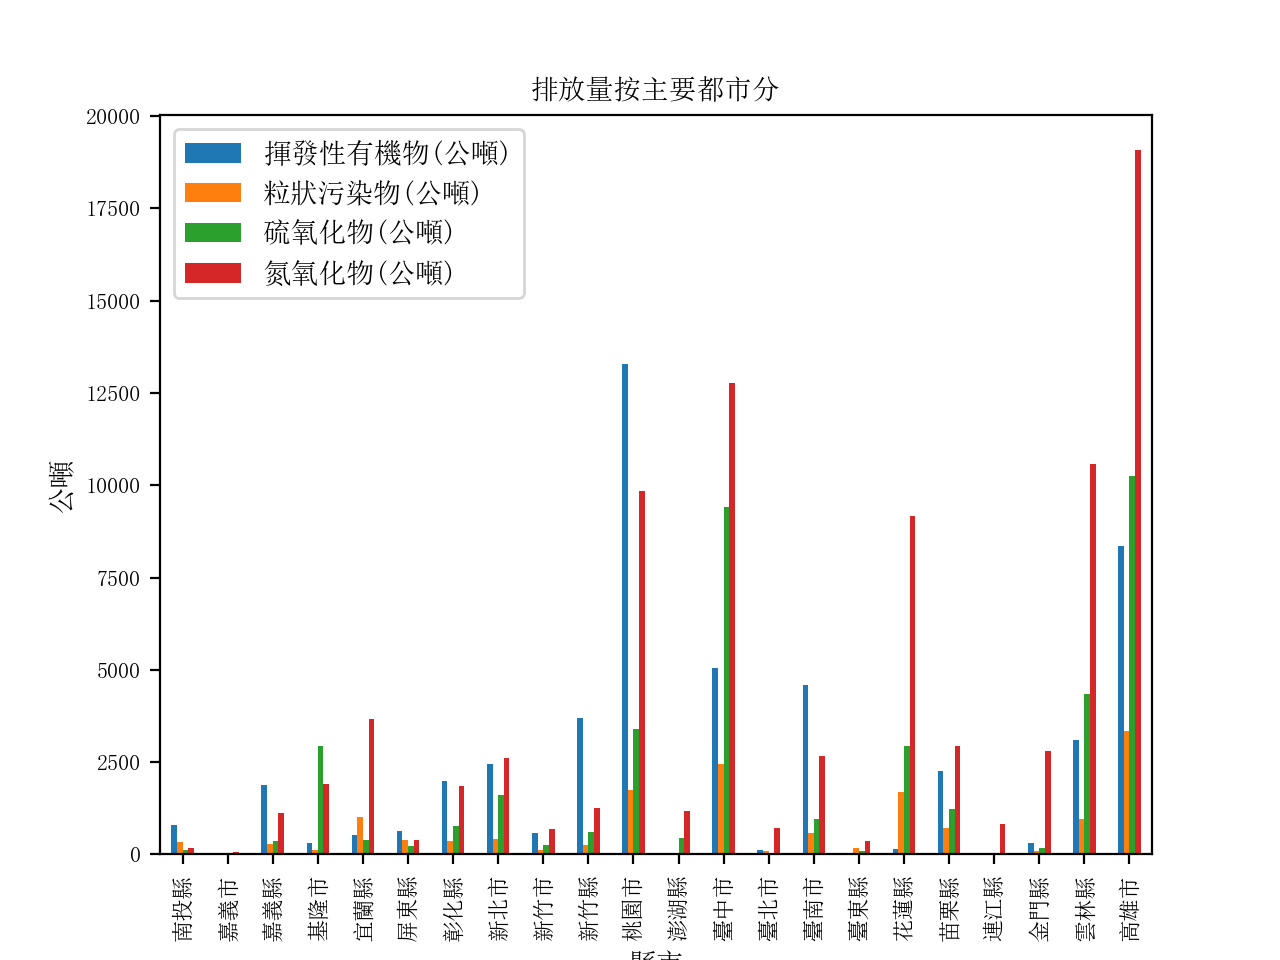

In [14]:
%matplotlib notebook
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df2.plot(kind='bar') #line type have problem
plt.title("排放量按主要都市分",fontproperties=myfont) 
plt.xlabel('縣市',fontproperties=myfont)
plt.ylabel('公噸',fontproperties=myfont)
#plt.yticks(fontproperties=myfont)
#plt.xticks(np.arange(0, 1, step=0.2))
#plt.xticks(size='small',rotation=30,fontproperties=myfont)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)
plt.show()

In [ ]:
#ld_df
df=ldMgr.load_df('排放量申報資料_108')
#ld_df['wkg_df']['gov_statistics']
df

In [9]:
#df['溪流wikiID'].unique()
df['溪流名稱'].describe()

count     8362
unique    4267
top        濁水溪
freq        59
Name: 溪流名稱, dtype: object

In [5]:
wdMgr=WikiDataMgr()
query_str= """
            SELECT DISTINCT ?river ?riverLabel ?destLabel ?river_length ?riverAltLabel WHERE {
          ?river wdt:P17 wd:Q865;
            wdt:P31 wd:Q4022.
            OPTIONAL {?river wdt:P403 ?dest.}
            OPTIONAL {?river wdt:P2043 ?river_length.}
          
          SERVICE wikibase:label { bd:serviceParam wikibase:language "zh". }
        }
        ORDER BY DESC(?length)
            """
wdMgr.wikidata_get('river.json',query_str)
df=wdMgr.load_json('river.json')


In [4]:
df

,river,riverLabel,destLabel,river_length,riverAltLabel
0,http://www.wikidata.org/entity/Q7416346,三疊溪,北港溪,None,None
1,http://www.wikidata.org/entity/Q7419001,三峽河,大漢溪,28.5,"三峡河, 三峽溪"
2,http://www.wikidata.org/entity/Q7502643,壽豐溪,花蓮溪,None,知亞干溪
3,http://www.wikidata.org/entity/Q7504436,雙溪,太平洋,26.81,双溪
4,http://www.wikidata.org/entity/Q7675688,大湖口溪,北港溪,None,None
5,http://www.wikidata.org/entity/Q7967136,萬大溪,濁水溪,None,None
6,http://www.wikidata.org/entity/Q7967982,萬里溪,花蓮溪,None,None
7,http://www.wikidata.org/entity/Q8007827,頭前溪,台灣海峽,None,None
8,http://www.wikidata.org/entity/Q8007897,急水溪,台灣海峽,None,None
9,http://www.wikidata.org/entity/Q8007924,鹽水溪,台灣海峽,None,None


In [21]:
from dbfread import DBF
import pandas as pd 
dbf_file = "dataset/town_tw97_teds_id.dbf" 

tedsid_table = DBF(dbf_file,char_decode_errors='ignore',encoding='utf8',load=True)

cols = []
for field in tedsid_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
tedsid_df = pd.DataFrame(tedsid_table.records,  columns =cols) 
tedsid_df


,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,TEDS_01_co,TEDS_01__1,TEDS_01__2,點線面_,點線_1,點線_2,點線_3
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,4602,17276,17276,13.773,15.732530,71.401085,100.906615
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,4321,16262,16262,0.001,17.470838,64.728056,82.199894
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,3913,12158,12158,586.362,38.631554,348.614711,973.608265
3,V11,10014110,臺東縣,綠島鄉,Lvdao Township,V,10014,4611,17285,17285,4.023,1.572894,10.860741,16.456635
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,4616,17290,17290,4.004,2.146875,43.953513,50.104388
5,N07,10007120,彰化縣,田中鎮,Tianzhong Township,N,10007,3707,10113,10113,20.796,14.690836,53.642908,89.129744
6,N19,10007170,彰化縣,社頭鄉,Shetou Township,N,10007,3719,10125,10125,6.408,15.105583,50.462523,71.976106
7,T14,10013140,屏東縣,竹田鄉,Zhutian Township,T,10013,4314,16255,16255,0.291,43.864477,53.959124,98.114601
8,T05,10013050,屏東縣,萬丹鄉,Wandan Township,T,10013,4305,16246,16246,36.309,59.678584,72.539806,168.527390
9,K13,10005160,苗栗縣,三灣鄉,Sanwan Township,K,10005,3516,08083,08083,6.167,5.017253,23.698034,34.882287
